In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import pymongo as pm
import numpy as np
import h5py
import scipy as sp
import scipy.stats as stats
import os

In [2]:
import tensorflow as tf
from models_alexnet import alexnet
from models_alexnet import alexnet_wrapper


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [3]:
from utils import norm_image
from utils import softmax

In [4]:
#setup paths
STIM_PATH = "../data/full_res/"
CKPT_PATH = "../models/checkpoints/alexnet/model.ckpt-115000"

In [5]:
#let's test to make sure I'm actually getting the activations to the specific images and not just the weights
#i.e. let's do it again but with random noise and make sure it's different
# set up model
tf.reset_default_graph()
init = tf.random_uniform_initializer(minval=0, maxval=1) #initialize random noise

# set up the image variable
image_shape = (1, 224, 224, 3)
noise_images = tf.get_variable("images", image_shape, initializer=init)

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
noise_model = alexnet(noise_images, train=False)

In [10]:
# initialize tf Session and restore weighs
sess = tf.Session()
sess.run(tf.global_variables_initializer())
all_variables = tf.get_collection_ref(tf.GraphKeys.GLOBAL_VARIABLES)

# exclude the new image variables
temp_saver = tf.train.Saver(
    var_list=[v for v in all_variables if "images" not in v.name]
)
temp_saver.restore(sess, CKPT_PATH) #restore model weigths

INFO:tensorflow:Restoring parameters from ../models/checkpoints/alexnet/model.ckpt-115000


In [11]:
conv1_weights_tensor = tf.get_default_graph().get_tensor_by_name("conv1/weights:0")

In [12]:
#let's sanity check that we've actually restored the weights
sanity_weights = sess.run(conv1_weights_tensor)

Text(0.5, 1.0, 'Filter 10')

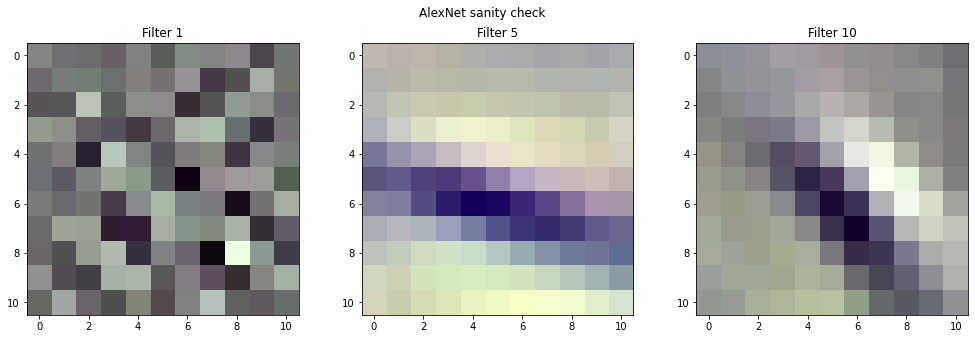

In [13]:
#plot select conv1 filters
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(17, 5), nrows=1, ncols=3)
title = "AlexNet sanity check" 
fig.suptitle(title)

true_filter_1 = norm_image(sanity_weights[:,:,:,1])
ax1.imshow(true_filter_1)
ax1.set_title("Filter 1")

true_filter_5 = norm_image(sanity_weights[:,:,:,5])
ax2.imshow(true_filter_5)
ax2.set_title("Filter 5")

true_filter_10 = norm_image(sanity_weights[:,:,:,10])
ax3.imshow(true_filter_10)
ax3.set_title("Filter 10")

In [20]:
conv1_outputs = noise_model.layers['conv1']

In [22]:
conv1_outputs = sess.run(conv1_outputs)
print(conv1_outputs.shape)

(1, 54, 54, 96)


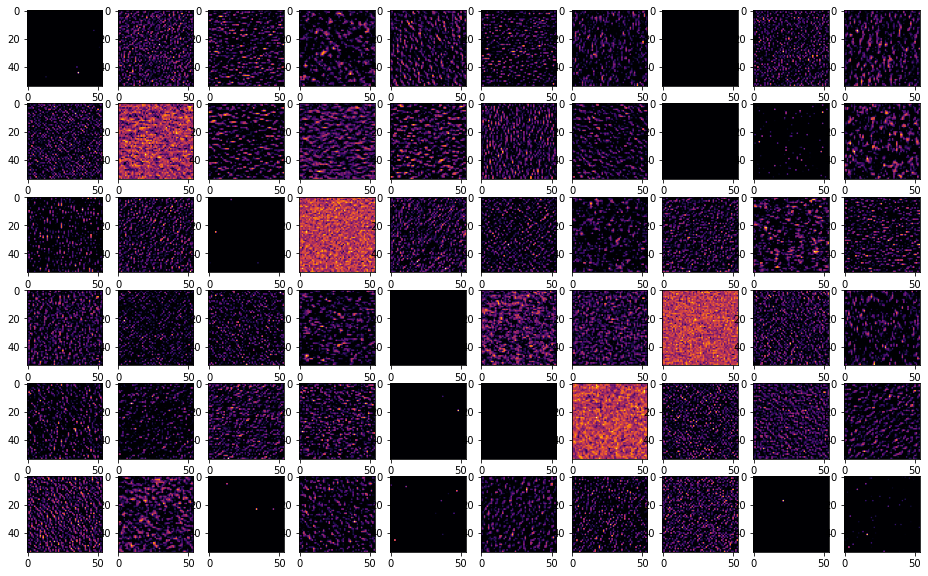

In [23]:
#visualize some features to check they're different
for image_idx in [0]:

    fav_image = conv1_outputs[image_idx,:,:,:]
    fav_image = np.moveaxis(fav_image, -1, 0) #put num of features in first column

    fig = plt.figure(figsize=(16,10))

    for idx in range(60):
        ax = fig.add_subplot(6, 10, idx+1) 
        ax.imshow(fav_image[idx,:,:], cmap="inferno") 


In [14]:
conv3_outputs = noise_model.layers['conv3']

In [15]:
# run whatever tensors we care about
conv3_outputs = sess.run(conv3_outputs)
print(conv3_outputs.shape)

(1, 14, 14, 384)


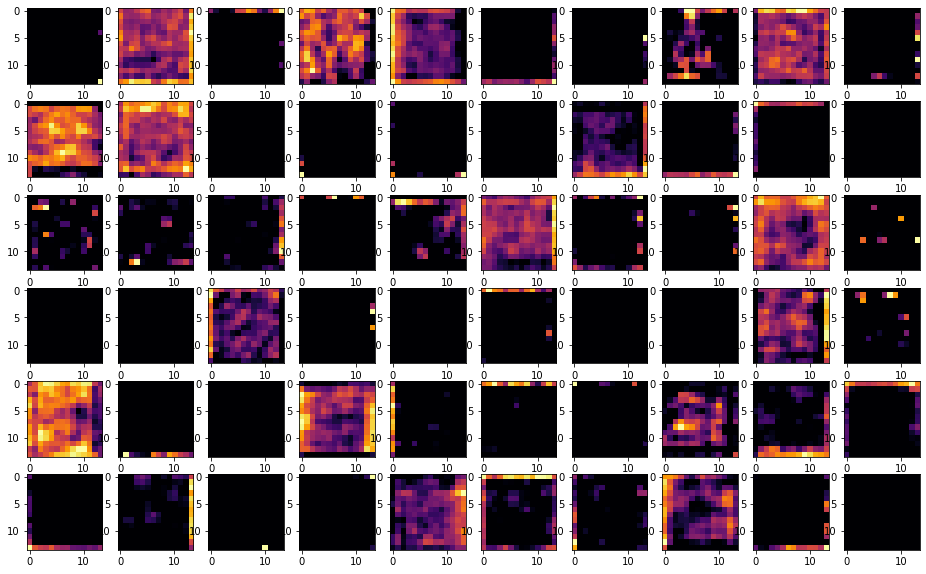

In [17]:
#visualize some features to check they're different
for image_idx in [0]:

    fav_image = conv3_outputs[image_idx,:,:,:]
    fav_image = np.moveaxis(fav_image, -1, 0) #put num of features in first column

    fig = plt.figure(figsize=(16,10))

    for idx in range(60):
        ax = fig.add_subplot(6, 10, idx+1) 
        ax.imshow(fav_image[idx,:,:], cmap="inferno") 


In [18]:
#phew